# Visualisation with Seaborn

Matplotlib is incredibly useful and popular as a visualisation tool.

Functional, yet dated in certain areas.

API is relatively low-level

Predates Pandas and as such you must first extract a relevant `Series` from a `DataFrame`.

Seaborn overcomes these issues.

## Seaborn versus Matplotlib

Let's have a look at how to do a random-walk plot in Matplotlib:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

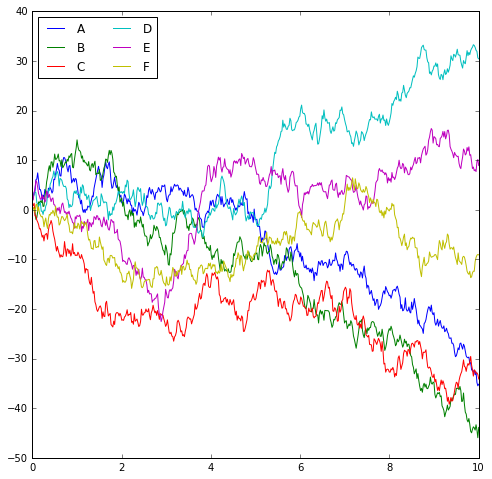

In [3]:
# Plot the data with Matplotlib defaults
plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [4]:
import seaborn as sns
sns.set()

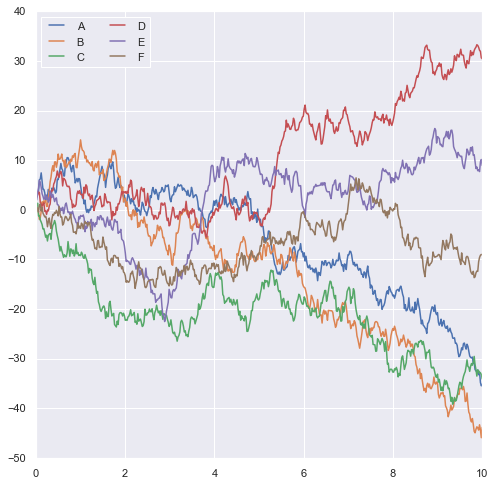

In [5]:
# same plotting code as above!
plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

# Exploring Seaborn Plots

With Seaborn, high-level commands can be used to create different plot types for statistical data exploration and model fitting.

Seaborn comes with some in-built datasets.

N.B we could do this with MatplotLib but Seaborn API is nicer :)

## Histograms, KDE, and densities

Often in __statistical data visualization__, all you want is to plot histograms and joint distributions of variables. (We have seen that this is relatively straightforward in Matplotlib)

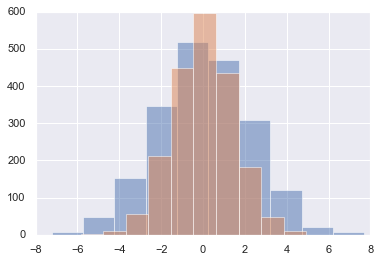

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with `sns.kdeplot`:

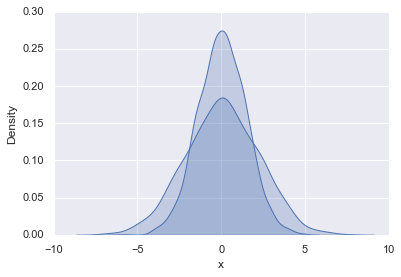

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using `distplot`:

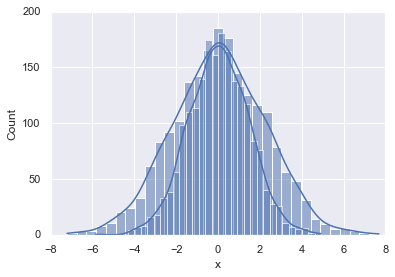

In [27]:
sns.histplot(data['x'], kde=True)
sns.histplot(data['y'], kde=True);

If we pass the full two-dimensional dataset to `kdeplot`, we will get a two-dimensional visualization of the data:

<AxesSubplot:xlabel='x', ylabel='y'>

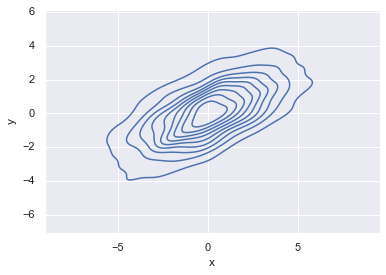

In [9]:
sns.kdeplot(x=data['x'], y=data['y'])

We can see the joint distribution and the marginal distributions together using `sns.jointplot`. For this plot, we'll set the style to a white background:

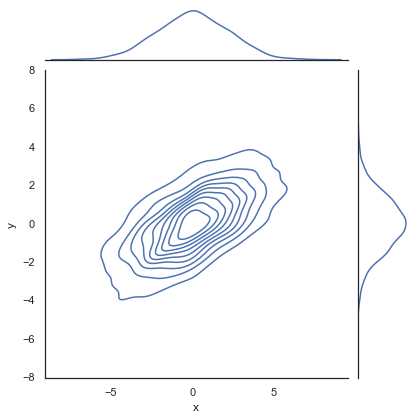

In [10]:
with sns.axes_style('white'):
    sns.jointplot(data=data, x=data['x'], y=data['y'], kind='kde');

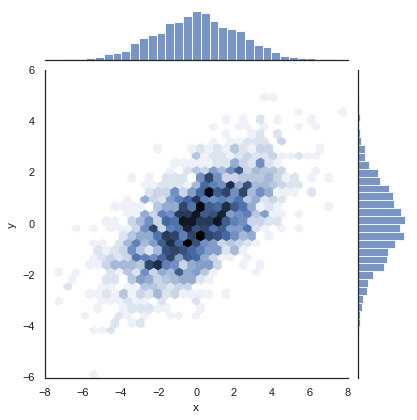

In [11]:
with sns.axes_style('white'):
    sns.jointplot(data=data, x=data['x'], y=data['y'], kind='hex');

# Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*.

This is very useful for exploring correlations between multidimensional data.

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


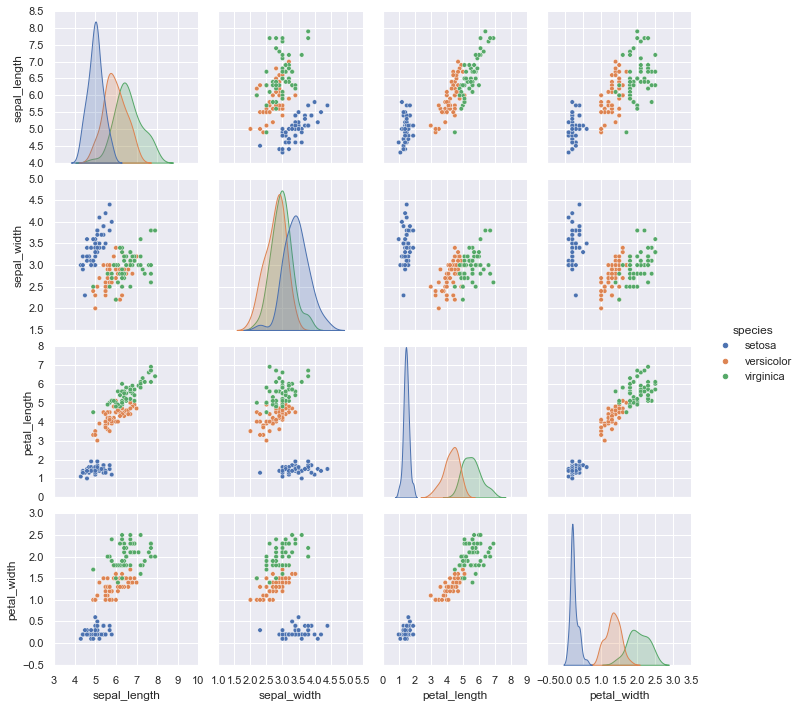

In [13]:
sns.pairplot(iris, hue='species', height=2.5);

## Faceted histograms

Sometimes the best way to view data is via histograms of subsets. 


Seaborn's `FacetGrid` makes this extremely simple. 

We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


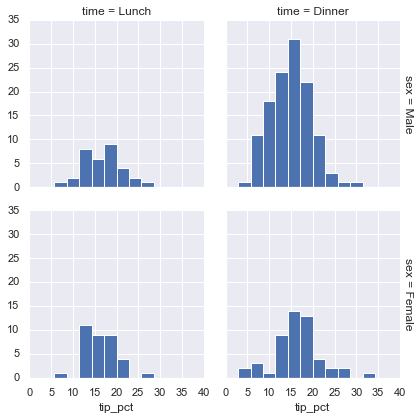

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Factor plots

Factor plots can be useful for this kind of visualization as well. 

This allows you to view the distribution of a parameter within bins defined by any other parameter:

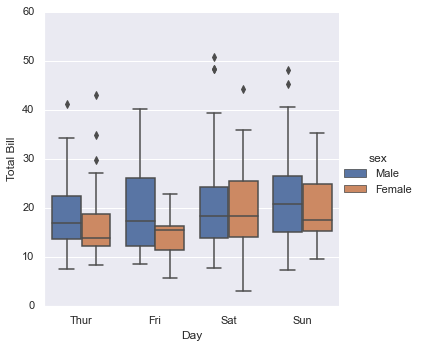

In [16]:
g = sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="box")
g.set_axis_labels("Day", "Total Bill")

## Joint distributions

Joint distributions
Similar to the pairplot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions:

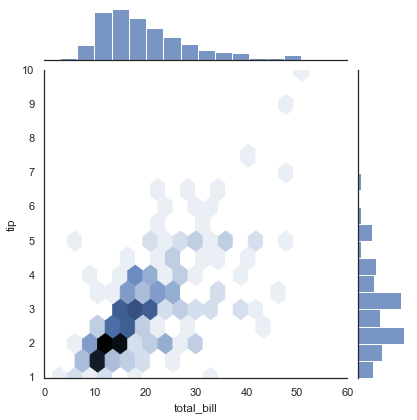

In [17]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

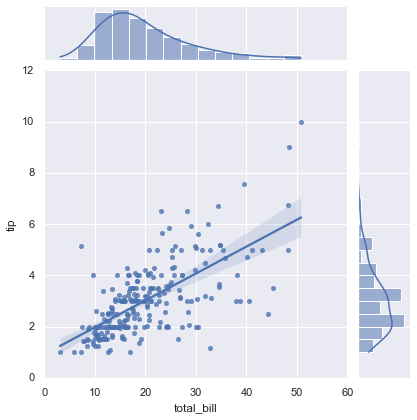

In [18]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

## Bar plots

Time series can be plotted using `sns.catplot`.

Let's look at some planetary data to motivate this example:

In [19]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


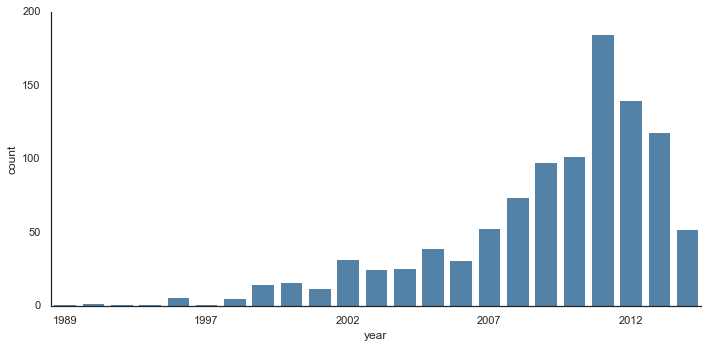

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the method of discovery of each of these planets:

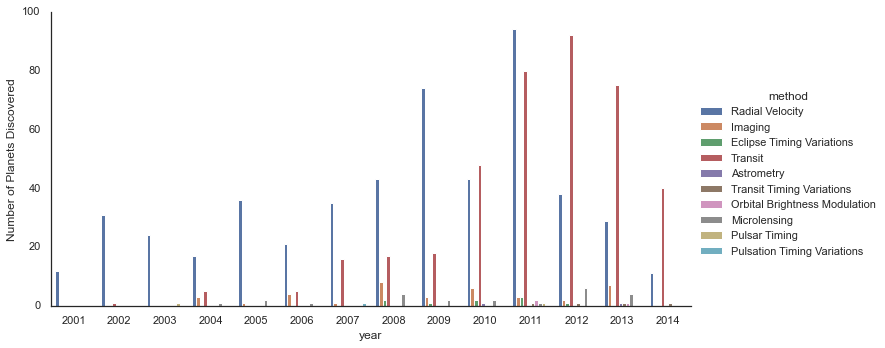

In [21]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

# Summary

Matplotlib is great for basic plotting.

Seaborn caters for slightly more advanced plotting methodologies.

Seaborn has a better look and feel.

Likely to use this for visualising outcomes of machine learning...